### Logistic Regression Q2
The spambase dataset is can be used to train models for spam email detection. The data and detail information can be found on the UCI Machine Learning Repository. Here's a link to the dataset: Spambase Dataset.

### 0. Load the data and review information about the data.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
column_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"

# Load the dataset (features and target)
columns = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d", "word_freq_our",
    "word_freq_over", "word_freq_remove", "word_freq_internet", "word_freq_order", "word_freq_mail",
    "word_freq_receive", "word_freq_will", "word_freq_people", "word_freq_report", "word_freq_addresses",
    "word_freq_free", "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money", "word_freq_hp",
    "word_freq_hpl", "word_freq_george", "word_freq_650", "word_freq_lab", "word_freq_labs",
    "word_freq_telnet", "word_freq_857", "word_freq_data", "word_freq_415", "word_freq_85",
    "word_freq_technology", "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project", "word_freq_re",
    "word_freq_edu", "word_freq_table", "word_freq_conference", "char_freq_;", "char_freq_(",
    "char_freq_[", "char_freq_!", "char_freq_$", "char_freq_#", "capital_run_length_average",
    "capital_run_length_longest", "capital_run_length_total", "is_spam"
]
data = pd.read_csv(url, header=None, names=columns)

In [15]:
data.shape

(4601, 58)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [11]:
data.isnull().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

### 1. Load the dataset. Make sure to load the features (X) and target (y) separately.

In [51]:
X=data.drop(columns=["is_spam"])
y=data["is_spam"]

### 2. Compute a summary statistics (count, mean, standard deviation, min,  25%, 50% , 75% percentiles, max) for each variable including the target.

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
word_freq_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
word_freq_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
word_freq_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
word_freq_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
word_freq_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
word_freq_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
word_freq_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
word_freq_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
word_freq_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
word_freq_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


### 3. Plot a bar chart showing the correlation between the target and each feature

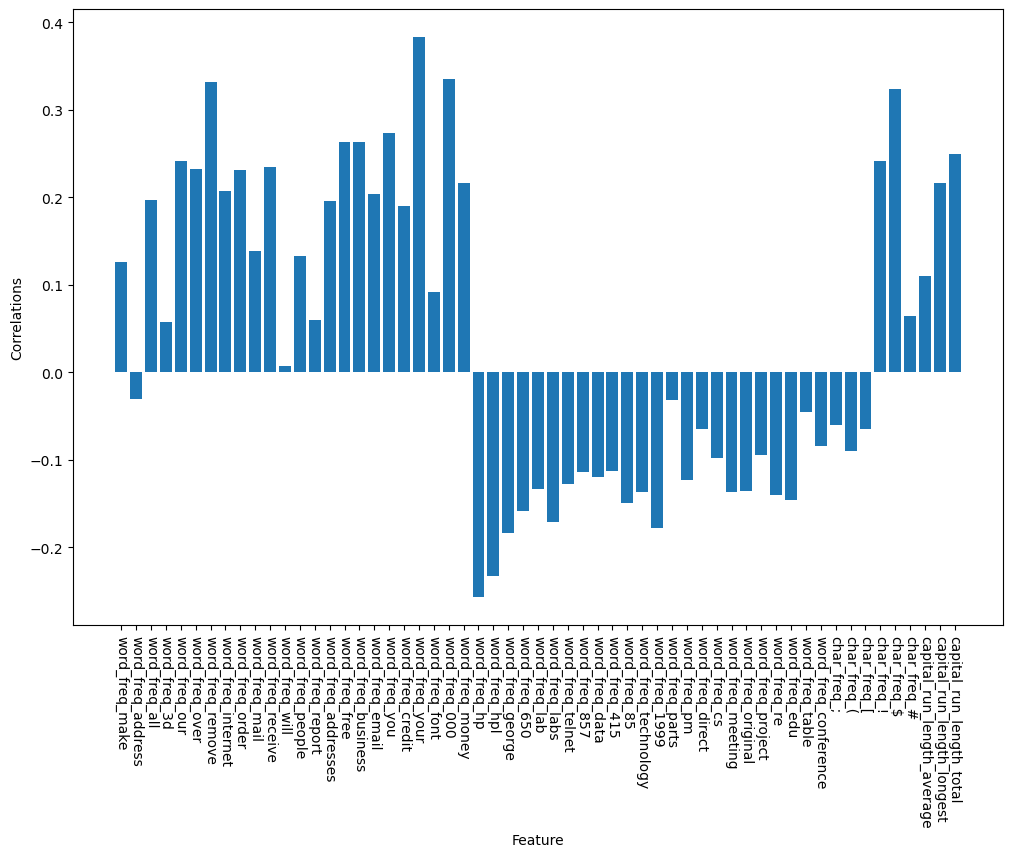

In [57]:
correlations=X.corrwith(y)
plt.figure(figsize=(12, 8))
plt.bar(X.columns, correlations)
plt.xlabel("Feature")
plt.ylabel("Correlations")
plt.xticks(rotation=270)
plt.show()

### 4. Normalize and split the data into training, validation, and testing datasets.

In [55]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing datasets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

### 5. Initiate a LogisticRegression module with elasticnet penalty in sklearn. Select a range of values of C and l1_ratio (hyperparameter space), set up the GridSearchCV with cv=3 and scoring='accuracy' and execute the model fit.

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# Initiate Logistic Regression with elasticnet penalty
log_reg = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Define hyperparameter grid
param_grid = { 'C': [0.01, 0.1, 1, 10, 100],
               'l1_ratio': [0, 0.25, 0.5, 0.75, 1 ]}

# Set up GridSearchCV with accuracy as the scoring metric
grid_search = GridSearchCV(
    estimator=log_reg,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 25 candidates, totalling 75 fits


GridSearchCV(cv=3,
             estimator=LogisticRegression(max_iter=10000, penalty='elasticnet',
                                          solver='saga'),
             n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1]},
             scoring='accuracy', verbose=1)

### 6. Report the cross-validation results

In [61]:
results_df=pd.DataFrame(grid_search.cv_results_)
columns_to_display=["param_C","param_l1_ratio","mean_test_score","rank_test_score"]
results_df=results_df[columns_to_display]
results_df=results_df.sort_values(by="rank_test_score")
results_df

,param_C,param_l1_ratio,mean_test_score,rank_test_score
22,100.00,0.50,0.921121,1
24,100.00,1.00,0.920810,2
21,100.00,0.25,0.920810,2
20,100.00,0.00,0.920810,2
17,10.00,0.50,0.920810,2
16,10.00,0.25,0.920810,2
23,100.00,0.75,0.920810,2
15,10.00,0.00,0.920500,8
19,10.00,1.00,0.920499,9
18,10.00,0.75,0.920499,9


### 7. Which model was selected?

In [63]:
best_model = grid_search.best_estimator_
print("Best Model Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

Best Model Parameters: {'C': 100, 'l1_ratio': 0.5}
Best Cross-Validation Accuracy: 0.9211206968864453


### 8. Evaluate the model on the test dataset. Report the squared root of the accuracy.

In [65]:
from sklearn.metrics import accuracy_score

y_test_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_test_pred)

sqrt_accuracy = np.sqrt(test_accuracy)

rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))


print(f"Test Accuracy: {test_accuracy:.4f}")
print("Root Mean Squared Error (RMSE) on Test Data:", rmse)
print(f"Square Root of Test Accuracy: {sqrt_accuracy:.4f}")

Test Accuracy: 0.9261
Root Mean Squared Error (RMSE) on Test Data: 0.27177108397591776
Square Root of Test Accuracy: 0.9624


### 9. Display the top 10 positive parameter estimates. Display the top 10 negative parameter estimates.

Top 10 Positive Coefficients:
word_freq_3d                  1.736552
char_freq_$                   1.194088
char_freq_#                   1.121477
word_freq_free                0.927317
word_freq_000                 0.887477
capital_run_length_longest    0.884030
word_freq_remove              0.857587
word_freq_credit              0.711238
capital_run_length_total      0.695873
word_freq_technology          0.482687
dtype: float64

Top 10 Negative Coefficients:
word_freq_george       -8.531045
word_freq_hp           -3.279492
word_freq_cs           -3.077509
word_freq_project      -1.580752
word_freq_meeting      -1.333157
word_freq_lab          -1.279495
word_freq_edu          -1.209841
word_freq_conference   -1.125653
word_freq_85           -0.823401
word_freq_hpl          -0.774636
dtype: float64


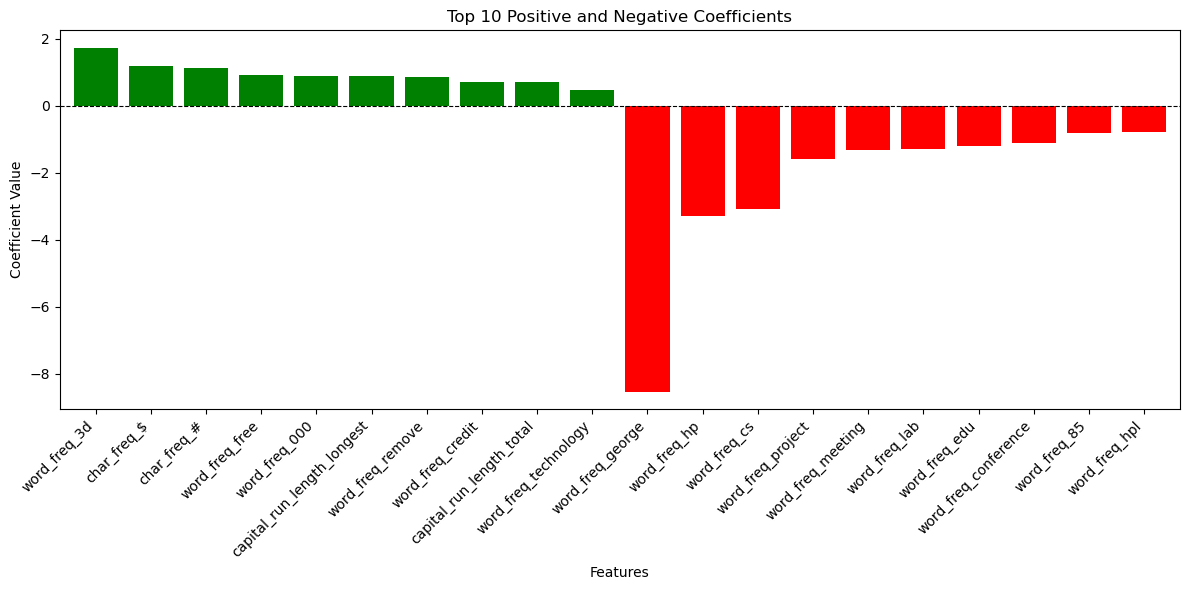

In [67]:
import matplotlib.pyplot as plt

coefficients = pd.Series(best_model.coef_.flatten(), index=X.columns)

# Get the top 10 positive and top 10 negative coefficients
top_10_positive = coefficients.nlargest(10)
top_10_negative = coefficients.nsmallest(10)

print("Top 10 Positive Coefficients:")
print(top_10_positive)

print("\nTop 10 Negative Coefficients:")
print(top_10_negative)

top_10_combined = pd.concat([top_10_positive, top_10_negative])

plt.figure(figsize=(12, 6))
top_10_combined.plot(kind='bar', color=['green' if x > 0 else 'red' for x in top_10_combined], width=0.8)
plt.title("Top 10 Positive and Negative Coefficients")
plt.ylabel("Coefficient Value")
plt.xlabel("Features")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.tight_layout()
plt.show()

